<font color ='brown'>
    

    
### Load and Check Data 

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

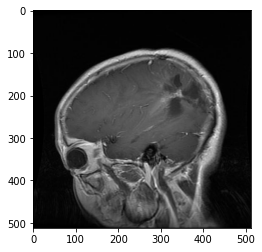

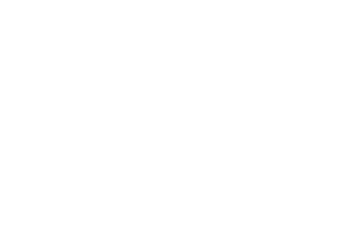

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

DATADIR = r"/kaggle/input/brain-tumor-classification-mri/Training/"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 149.5, 149.5, -0.5)

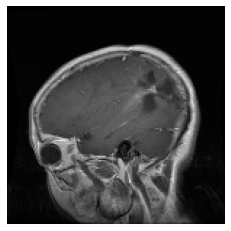

In [3]:
IMG_SIZE = 150
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))    
plt.imshow(new_array,cmap = "gray")
plt.axis("off")


# Data Visualization 

In [95]:
import plotly.express as px
classes_info = {}
classes = sorted(os.listdir(DATADIR))
for name in classes:
    classes_info[name] = len(os.listdir(DATADIR + f'/{name}'))
print(classes_info)
fig = px.pie(names=classes_info.keys(),values=classes_info.values(),hole=0.05,title='CLasses Info')
fig.update_layout({'title':{"x":0.1}})
fig.show()

{'glioma_tumor': 826, 'meningioma_tumor': 822, 'no_tumor': 395, 'pituitary_tumor': 827}


In [96]:
glimoa_train = os.listdir("../input/brain-tumor-classification-mri/Training/glioma_tumor")
men_train =  os.listdir("../input/brain-tumor-classification-mri/Training/meningioma_tumor")
notumor_train = os.listdir("../input/brain-tumor-classification-mri/Training/no_tumor")
pit_train =  os.listdir("../input/brain-tumor-classification-mri/Training/pituitary_tumor")

<AxesSubplot:>

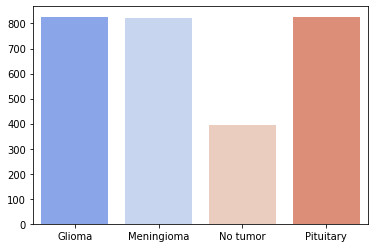

In [99]:
#picture in the  dataset
labels = ["Glioma", "Meningioma", "No tumor", "Pituitary"]
values = [len(glimoa_train), len(men_train), len(notumor_train), len(pit_train)]
sns.barplot(x = labels, y = values, palette="coolwarm")

### MANIPULATING DATA

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [5]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X.shape)
X = X/255.0  
X = X.reshape(-1,150,150,1)

(2870, 150, 150)


In [6]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y = to_categorical(y, num_classes = 4)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (2296, 150, 150, 1)
x_test shape (574, 150, 150, 1)
y_train shape (2296, 4)
y_test shape (574, 4)


### PREDICTION USING CNN

In [77]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop ,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Activation

In [71]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)  

In [85]:
model1 =Sequential()
#4convolution layers and 2 maxpoollayer
model1.add(Conv2D(filters=32,kernel_size=5,input_shape=(150,150,1)))
model1.add(Activation('relu'))

model1.add(Conv2D(filters=32,kernel_size=4,input_shape=(150,150,1)))
model1.add(Activation('relu'))

model1.add(MaxPool2D(pool_size=3))

model1.add(Conv2D(filters=25,kernel_size=3,input_shape=(100,100,1)))
model1.add(Activation('relu'))

model1.add(Conv2D(filters=25,kernel_size=2,input_shape=(50,50,3)))
model1.add(Activation('relu'))

model1.add(MaxPool2D(pool_size=3))
#flatten layer
model1.add(Flatten())
#Deeeper hidden layer
model1.add(Dense(250))
model1.add(Activation('relu'))
#output layer
model1.add(Dense(4))
model1.add(Activation('sigmoid'))
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
epochs= 10


In [86]:
from keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [87]:
history1 = model1.fit(X_train,Y_train,epochs=5,validation_data=(X_val,Y_val),callbacks=[early_stop])

Epoch 1/5
72/72 [==============================] - 55s 752ms/step - loss: 1.0409 - accuracy: 0.5557 - val_loss: 0.7951 - val_accuracy: 0.6533
Epoch 2/5
72/72 [==============================] - 54s 751ms/step - loss: 0.6774 - accuracy: 0.7130 - val_loss: 0.6044 - val_accuracy: 0.7596
Epoch 3/5
72/72 [==============================] - 54s 747ms/step - loss: 0.4949 - accuracy: 0.8071 - val_loss: 0.6564 - val_accuracy: 0.7021
Epoch 4/5
72/72 [==============================] - 54s 758ms/step - loss: 0.3790 - accuracy: 0.8541 - val_loss: 0.6105 - val_accuracy: 0.7805
Epoch 5/5
72/72 [==============================] - 54s 750ms/step - loss: 0.2949 - accuracy: 0.8846 - val_loss: 0.4783 - val_accuracy: 0.8153


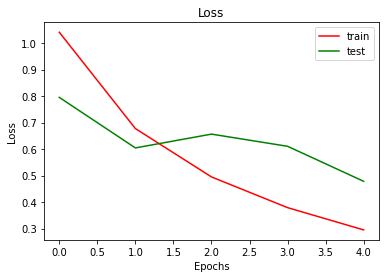

In [90]:
plt.plot(history1.history["loss"],c = "red")
plt.plot(history1.history["val_loss"],c = "green")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

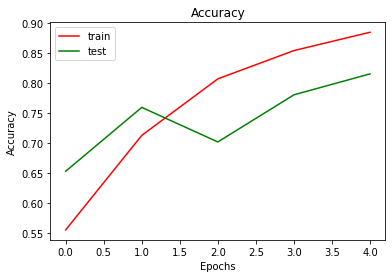

In [88]:
plt.plot(history1.history["accuracy"],c = "red")
plt.plot(history1.history["val_accuracy"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [74]:

model2 = Sequential()
#
model2.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
#
model2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.25))

model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))
#
model2.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))

#
model2.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))

# 
model2.add(Flatten())
model2.add(Dense(1024, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(4, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 15  
batch_size = 40



In [75]:
datagen.fit(X_train)
history2 = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size) 

Epoch 1/15
57/57 [==============================] - 84s 1s/step - loss: 1.3270 - accuracy: 0.3635 - val_loss: 1.1810 - val_accuracy: 0.5035
Epoch 2/15
57/57 [==============================] - 84s 1s/step - loss: 1.0256 - accuracy: 0.5488 - val_loss: 1.0145 - val_accuracy: 0.5523
Epoch 3/15
57/57 [==============================] - 83s 1s/step - loss: 0.8283 - accuracy: 0.6427 - val_loss: 0.9157 - val_accuracy: 0.5592
Epoch 4/15
57/57 [==============================] - 84s 1s/step - loss: 0.7546 - accuracy: 0.6707 - val_loss: 0.7329 - val_accuracy: 0.6655
Epoch 5/15
57/57 [==============================] - 83s 1s/step - loss: 0.6607 - accuracy: 0.7203 - val_loss: 0.6904 - val_accuracy: 0.6812
Epoch 6/15
57/57 [==============================] - 83s 1s/step - loss: 0.6172 - accuracy: 0.7482 - val_loss: 0.8129 - val_accuracy: 0.6063
Epoch 7/15
57/57 [==============================] - 83s 1s/step - loss: 0.5783 - accuracy: 0.7562 - val_loss: 0.6337 - val_accuracy: 0.7143
Epoch 8/15
57/57 [==

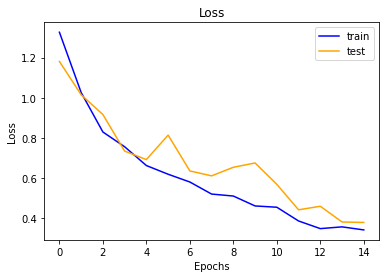

In [92]:
plt.plot(history2.history["loss"],c = "blue")
plt.plot(history2.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

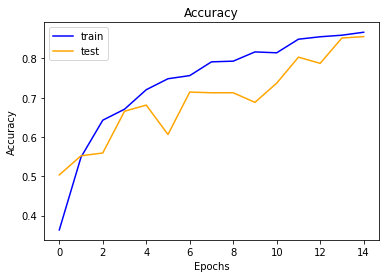

In [94]:
plt.plot(history2.history["accuracy"],c = "blue")
plt.plot(history2.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [8]:

model = Sequential()
#
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 50  
batch_size = 40
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)  


2022-11-16 10:48:06.865681: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
datagen.fit(X_train)
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size)    

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-11-16 10:48:07.530785: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
57/57 [==============================] - 111s 2s/step - loss: 1.2659 - accuracy: 0.4113 - val_loss: 1.1351 - val_accuracy: 0.5767
Epoch 2/50
57/57 [==============================] - 109s 2s/step - loss: 0.9462 - accuracy: 0.5926 - val_loss: 0.8845 - val_accuracy: 0.5976
Epoch 3/50
57/57 [==============================] - 109s 2s/step - loss: 0.8523 - accuracy: 0.6308 - val_loss: 0.7746 - val_accuracy: 0.6829
Epoch 4/50
57/57 [==============================] - 110s 2s/step - loss: 0.7351 - accuracy: 0.6684 - val_loss: 0.6521 - val_accuracy: 0.7213
Epoch 5/50
57/57 [==============================] - 108s 2s/step - loss: 0.6371 - accuracy: 0.7216 - val_loss: 0.6949 - val_accuracy: 0.7056
Epoch 6/50
57/57 [==============================] - 110s 2s/step - loss: 0.6075 - accuracy: 0.7411 - val_loss: 0.5618 - val_accuracy: 0.7596
Epoch 7/50
57/57 [==============================] - 108s 2s/step - loss: 0.5526 - accuracy: 0.7726 - val_loss: 0.5923 - val_accuracy: 0.7317
Epoch 8/50
57

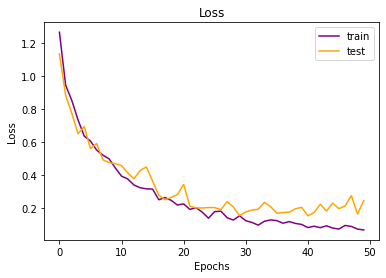

In [10]:
plt.plot(history.history["loss"],c = "purple")
plt.plot(history.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

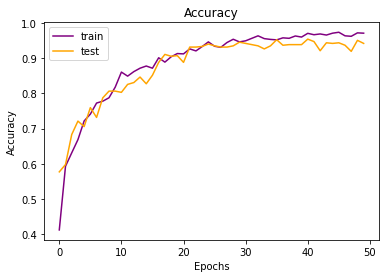

In [11]:
plt.plot(history.history["accuracy"],c = "purple")
plt.plot(history.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [12]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix

In [13]:
classes=[]
filename='../input/brain-tumor-classification-mri'
for sub_folder in os.listdir(os.path.join(filename,'Training')):
    classes.append(sub_folder)
print(classes)

['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']


In [17]:
import seaborn as sns

Confusion Matrix


Text(70.8, 0.5, 'Predicted class')

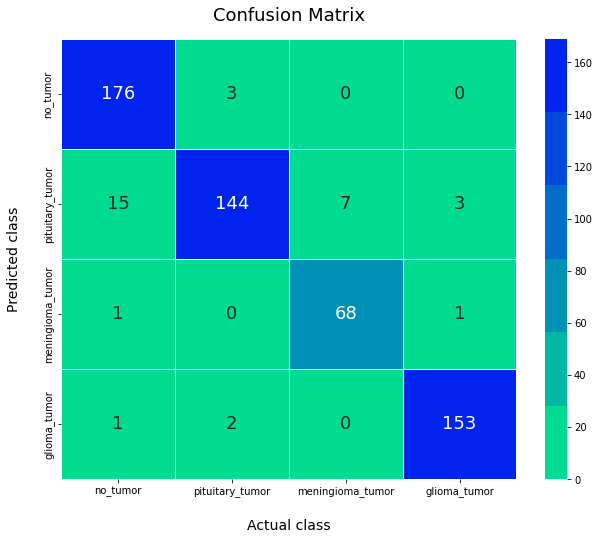

In [18]:
y_test_arg=np.argmax(Y_val,axis=1)
Y_pred = np.argmax(model.predict(X_val),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
fig,ax= plt.subplots(figsize=(10.2,8.1))
a=sns.color_palette("winter_r")  #_r inverts the palette
sns.heatmap(cm, annot=True,fmt='g',linewidths=1,linecolor='white',robust=True,annot_kws={"size":18},cmap=a)
#annot_kws: settings about annotations
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);
plt.yticks(va="center")
plt.title('Confusion Matrix',fontsize=18,pad=18)
plt.xlabel('Actual class',labelpad=22,fontsize=14)
plt.ylabel('Predicted class',labelpad=22,fontsize=14)

In [68]:
predict_x=model.predict(X_val) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

array([0, 3, 0, 0, 3, 1, 3, 2, 0, 3, 0, 1, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3,
       1, 3, 1, 0, 3, 0, 3, 0, 1, 2, 2, 0, 3, 1, 0, 2, 3, 1, 1, 3, 3, 3,
       2, 3, 3, 0, 1, 3, 1, 3, 1, 1, 0, 3, 0, 2, 2, 1, 1, 1, 0, 0, 0, 2,
       1, 0, 2, 1, 1, 3, 0, 1, 2, 0, 3, 1, 0, 0, 2, 0, 1, 2, 0, 1, 0, 3,
       3, 3, 2, 1, 2, 3, 0, 1, 0, 1, 3, 2, 3, 0, 2, 2, 1, 1, 3, 0, 3, 1,
       1, 3, 2, 3, 3, 3, 3, 3, 2, 0, 0, 3, 2, 3, 0, 2, 1, 0, 0, 0, 0, 0,
       2, 1, 3, 3, 2, 3, 0, 1, 1, 3, 3, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 3,
       0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 3, 3, 3, 2, 0,
       0, 0, 3, 1, 1, 1, 2, 0, 0, 0, 3, 1, 3, 3, 2, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 3, 3, 3, 2, 0, 1, 0, 1, 0, 3, 1, 0, 3, 2, 3, 2, 0, 2, 3, 0,
       3, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 1, 1, 3, 0, 0, 3, 1, 1, 1, 3, 3,
       0, 0, 0, 0, 1, 1, 3, 3, 0, 1, 0, 1, 1, 0, 2, 2, 3, 3, 3, 3, 1, 3,
       1, 1, 1, 0, 3, 0, 1, 0, 0, 0, 1, 0, 3, 3, 1, 1, 0, 3, 3, 0, 2, 3,
       2, 1, 0, 2, 1, 1, 3, 0, 0, 0, 2, 1, 3, 3, 3,

In [60]:
Y_val2 = np.argmax(Y_val,axis=1)
Y_val2

array([0, 3, 0, 0, 3, 1, 3, 2, 0, 3, 1, 1, 1, 0, 3, 0, 1, 0, 2, 1, 0, 3,
       1, 3, 1, 0, 3, 1, 3, 0, 1, 2, 2, 0, 3, 1, 0, 2, 3, 1, 1, 3, 3, 3,
       2, 3, 3, 1, 1, 3, 1, 3, 1, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2,
       1, 0, 1, 1, 1, 3, 0, 1, 1, 0, 3, 3, 0, 0, 2, 0, 1, 2, 0, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 0, 1, 0, 1, 3, 2, 3, 0, 2, 2, 1, 1, 3, 0, 3, 1,
       0, 3, 2, 3, 3, 3, 3, 3, 2, 0, 0, 3, 2, 3, 0, 2, 1, 1, 0, 0, 0, 0,
       2, 1, 3, 3, 2, 3, 1, 1, 1, 1, 3, 0, 1, 3, 2, 0, 1, 2, 0, 2, 1, 3,
       0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 3, 3, 3, 2, 0,
       0, 0, 3, 1, 1, 1, 2, 0, 0, 0, 3, 1, 3, 3, 2, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 3, 3, 3, 2, 1, 1, 0, 1, 0, 3, 1, 0, 3, 2, 3, 2, 0, 2, 3, 0,
       3, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 3, 1, 1, 1, 3, 3,
       0, 0, 0, 0, 1, 1, 3, 3, 0, 1, 0, 1, 1, 0, 2, 2, 3, 3, 3, 3, 1, 3,
       1, 1, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 1, 0, 3, 3, 0, 2, 3,
       2, 1, 0, 2, 1, 1, 3, 0, 1, 0, 2, 1, 3, 3, 3,

In [54]:
model.save('kaggle_model_2.h5')

In [58]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(Y_val2,classes_x,target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.91      0.98      0.95       179
 pituitary_tumor       0.97      0.85      0.91       169
meningioma_tumor       0.91      0.97      0.94        70
    glioma_tumor       0.97      0.98      0.98       156

        accuracy                           0.94       574
       macro avg       0.94      0.95      0.94       574
    weighted avg       0.94      0.94      0.94       574



In [70]:
from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('FashionMNIST_weights.h5')

In [69]:
model.save('kaggle_model_4.HDF5')

2022-11-16 15:51:21.684241: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


101